Install Dependencies

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

Plotting function

In [17]:
def plot(X, y, y_pred):
  idx = torch.argsort(X, dim=0).squeeze()
  plt.figure(figsize=(8, 5))
  plt.scatter(X, y, label="Targets")
  plt.xlabel('x (inputs)')
  plt.ylabel('y (targets)')
  plt.title("Regression")
  plt.plot(X[idx], y_pred[idx], color="yellow", label="Prediction")
  plt.legend()
  plt.show()

Set random seed

In [ ]:
# Set Seed
np.random.seed(0)
torch.manual_seed(0)

Generate Data

In [3]:
# Number of samples
N = 512
# Number of features
d = 1
# Size of hidden layer
K = 512
# Number of iterations (training)
iters = 5000
# Number of iterations (evaluation)
epochs = 10
# Learning rate
lr = 0.003
# Training input
X_train = 5 * torch.randn(N, 1)
# Validation input
X_val = 5 * torch.randn(N, 1)
# Training targets
y_train = 10 * torch.sin(X_train) + torch.randn_like(X_train)
# Validation targets
y_val = 10 * torch.sin(X_val) + torch.randn_like(X_val)

Plot the Data

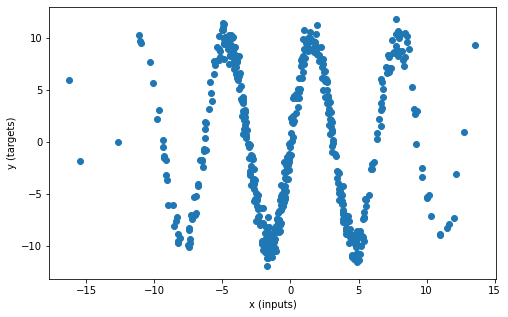

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train)
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

In [5]:
class MLP(nn.Module):

  """
   A neural network with a single hidden layer
   Structure is as follows:
   nn.Sequential(
        nn.Linear(input_dim, hidden_size) + nn.Tanh(), # Fully connected layer with Tanh activation
        nn.Linear(hidden_size, output_dim) # Final fully connected layer
    )
  """
  def __init__(self, input_dim, hidden_size, output_dim):
    """
    Initializing the parameters of MLP

    Args:
      input_dim: Int
        Number of input features
      hidden_size: Int
        Number of units in the hidden layer
      output_dim: Int
        Number of output features

    Returns:
      Nothing
    """
    super(MLP, self).__init__()
    self.layers = nn.Sequential(
      nn.Linear(input_dim, hidden_size),
      nn.Tanh(),
      nn.Linear(hidden_size, output_dim),
    )

  def forward(self, x):
    """
    Forward pass

    Args:
      x: torch.Tensor
        1D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    return self.layers(x)

In [6]:
# Creating an instance
model = MLP(input_dim = d, hidden_size = K, output_dim = 1)

# Stochstic Gradient Descent optimizer
sgd_optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# Create a mse loss function
criterion = nn.MSELoss()

In [7]:
def train(X, y, model, criterion, optimizer, iters):
  
  """
  Training function

  Args:
    X: torch.Tensor
      Features (input) with shape torch.Size([N, d])
    y: torch.Tensor
      Labels (targets) with shape torch.Size([N, 1])
    model: torch nn.Module
      The neural network
    criterion: function
      Loss function
    optimizer: function
      Optimizer
    iters: int
      Number of training iterations

  Returns:
    avg_loss: float
      Average loss over all iters
  """
  model.train()
  
  loss_record = [] # Keeping records of loss
  
  for i in range(iters):
    
    # Reset all gradients to zero
    optimizer.zero_grad()
    
    # Forward pass (Compute the output of the model on the features (inputs))
    y_pred = model(X_train)
    
    # Compute the loss
    loss = 0.5 * criterion(y_pred, y_train)
    
    # Perform backpropagation and compute the gradients
    loss.backward()

    # Optimizer takes a tiny step in the steepest direction (negative of gradient) and "updates" the weights and biases of the network
    optimizer.step()

    loss_record.append(loss.item())

  # Compute average loss over all iterations
  avg_loss = np.sum(loss_record) / iters

  return avg_loss

def eval(X, y):
  """
  Function to gauge network performance

  Args:
    X: torch.tensor
      Features (input) with shape torch.Size([N, d])
    y: torch.tensor
      Labels (targets) with shape torch.Size([N, 1])

  Returns:
    eval_loss: float 
      Scalar loss value over (X, y) using the model  
  """
  y_pred = model(X_val)

  eval_loss = 0.5 * criterion(y_pred, y_val).item()
      
  return eval_loss   

Main loop

In [13]:
"""
Trains the model and outputs the training loss.
Evaluates the learned model and outputs the validation loss.
"""
for i in range(epochs):
  losses = train(X_train, y_train, model, criterion, sgd_optimizer, iters)
  val_loss = eval(X_val, y_val)
  print(f'Epoch: {i} train loss: {losses:.2f} Validation loss: {val_loss:.2f}')

Epoch: 0 train loss: 0.51 Validation loss: 1.13
Epoch: 1 train loss: 0.51 Validation loss: 1.14
Epoch: 2 train loss: 0.51 Validation loss: 1.14
Epoch: 3 train loss: 0.51 Validation loss: 1.10
Epoch: 4 train loss: 0.50 Validation loss: 1.10
Epoch: 5 train loss: 0.50 Validation loss: 1.09
Epoch: 6 train loss: 0.50 Validation loss: 1.08
Epoch: 7 train loss: 0.49 Validation loss: 1.07
Epoch: 8 train loss: 0.49 Validation loss: 1.06
Epoch: 9 train loss: 0.49 Validation loss: 1.05


Visualize the Results

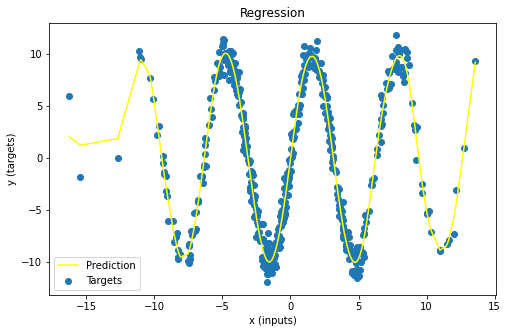

In [18]:
# Performance of training data
y_pred = model(X_train).detach().numpy()
plot(X_train, y_train, y_pred)

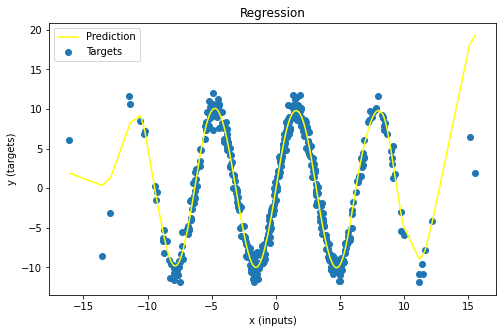

In [19]:
# Performance on validation data
y_pred = model(X_val).detach().numpy()
plot(X_val, y_val, y_pred)